<h1 style="color:blue">Générateur numérique

Le générateur de données numérique permet de générer des données sous forme de fonction sinusoïdale

<h2 style="color:orange">Simulation a l'aide d'une simple fonction

<h3 style="color:green">Géneration de la formule

In [19]:
from formule_mono_periode import FormuleMonoPeriode
from formule import Formule
periode = 20 #20 secondes
amplitude = 1
formule = Formule("Formule 1")
formule.ajouter_monoperiode(FormuleMonoPeriode(periode,amplitude))

<h3 style="color:green">Calcul de la formule

In [20]:
from controleur import Controleur

nombre_echantillon = 100
periode = 1 #1 seconde

controleur = Controleur(nombre_echantillon,periode)
controleur.ajouter_formule(formule)
controleur.calcul()

<h4 style="color:SkyBlue">Résultat : Tableau

In [21]:
controleur.data_frame.head(10)

,Formule 1
15:53:06 2022/04/02,0.000000
15:53:07 2022/04/02,0.309017
15:53:08 2022/04/02,0.587785
15:53:09 2022/04/02,0.809017
15:53:10 2022/04/02,0.951057
15:53:11 2022/04/02,1.000000
15:53:12 2022/04/02,0.951057
15:53:13 2022/04/02,0.809017
15:53:14 2022/04/02,0.587785
15:53:15 2022/04/02,0.309017


<h4 style="color:SkyBlue">Résultat : Graphique

<AxesSubplot:>

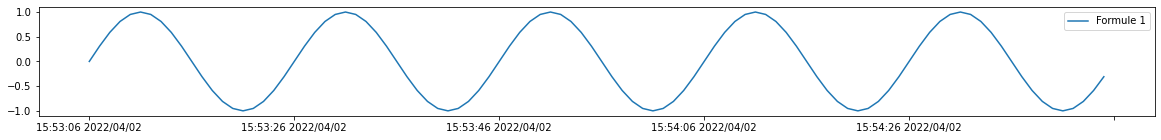

In [22]:
controleur.data_frame.plot(figsize=[20,2])

<h2 style="color:orange">Simulation a l'aide de bruit

<h3 style="color:green">Géneration de la formule

In [23]:
from formule_mono_periode import FormuleMonoPeriode
from formule_bruit import FormuleBruit
from formule import Formule
periode = 20 #20 secondes
amplitude = 1
bruit = 1

formule = Formule("Formule sans bruit")
formule.ajouter_monoperiode(FormuleMonoPeriode(periode,amplitude))

formule_bruit = Formule("Formule avec bruit")
formule_bruit.ajouter_monoperiode(FormuleMonoPeriode(periode,amplitude))
formule_bruit.ajouter_monoperiode(FormuleBruit(bruit))

<h3 style="color:green">Calcul de la formule

In [24]:
from controleur import Controleur

nombre_echantillon = 100
periode = 1 #1 seconde

controleur = Controleur(nombre_echantillon,periode)
controleur.ajouter_formule(formule)
controleur.ajouter_formule(formule_bruit)
controleur.calcul()

<h4 style="color:SkyBlue">Résultat : Tableau

In [25]:
controleur.data_frame.head(10)

,Formule sans bruit,Formule avec bruit
15:53:06 2022/04/02,0.000000,-0.273353
15:53:07 2022/04/02,0.309017,0.743404
15:53:08 2022/04/02,0.587785,0.747626
15:53:09 2022/04/02,0.809017,0.460170
15:53:10 2022/04/02,0.951057,1.356691
15:53:11 2022/04/02,1.000000,0.591036
15:53:12 2022/04/02,0.951057,1.158076
15:53:13 2022/04/02,0.809017,0.748872
15:53:14 2022/04/02,0.587785,0.706623
15:53:15 2022/04/02,0.309017,0.056858


<h4 style="color:SkyBlue">Résultat : Graphique

<AxesSubplot:>

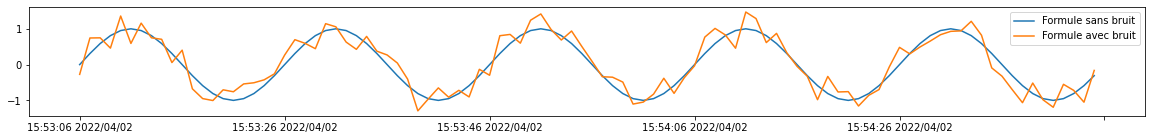

In [26]:
controleur.data_frame.plot(figsize=[20,2])

<h2 style="color:orange">Simulation a l'aide de fonction affine

<AxesSubplot:>

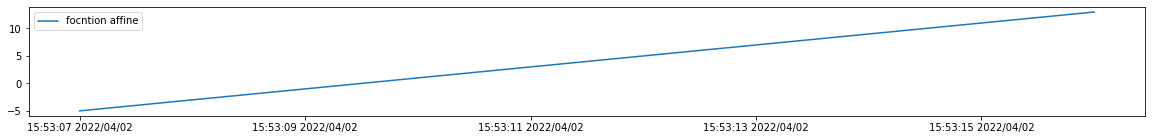

In [27]:
from formule import Formule
from formule_affine import FormuleAffine
from controleur import Controleur


formule_affine = FormuleAffine(2,-5)

formule = Formule("focntion affine")

nombre_echantillon = 10
periode = 1
formule.ajouter_monoperiode(formule_affine)

controleur = Controleur(nombre_echantillon,periode)
controleur.ajouter_formule(formule)
controleur.calcul()
controleur.data_frame.plot(figsize=[20,2])


<h2 style="color:orange">Simulation a l'aide de somme de fonction

Dans cette exemple nous voulons simuler un capteur de température ayant une température moyenne à 25°C et avec une amplitude de 5°C

<h3 style="color:green">Calcul des formules

Pour cela il faut 3 formules
<ul>
    <li>Une formule période de 1 journée et d'amplitude 5</li>
    <li>Une formule ayant une periode nulle et une amplitude de 25</li>
    <li>Une formule de bruit</li>
</ul>


In [28]:
from formule_mono_periode import FormuleMonoPeriode
from formule import Formule
from formule_bruit import FormuleBruit
from controleur import Controleur
formule_periodique = FormuleMonoPeriode(3600*24,5)
formule_periodique_nulle = FormuleMonoPeriode(0,25)
formule_bruit = FormuleBruit(1)

formule_temperature = Formule("Temperature")

nombre_echantillon = 144
periode = 3600 #1 heure
formule_temperature.ajouter_monoperiode(formule_periodique)
formule_temperature.ajouter_monoperiode(formule_periodique_nulle)
formule_temperature.ajouter_monoperiode(formule_bruit)

controleur = Controleur(nombre_echantillon,periode)
controleur.ajouter_formule(formule_temperature)
controleur.calcul()


<h4 style="color:SkyBlue">Résultat : Tableau

In [29]:
controleur.data_frame.head(10)

,Temperature
16:53:06 2022/04/02,25.444704
17:53:06 2022/04/02,26.091789
18:53:06 2022/04/02,27.817549
19:53:06 2022/04/02,28.576260
20:53:06 2022/04/02,29.416211
21:53:06 2022/04/02,30.212530
22:53:06 2022/04/02,30.350586
23:53:06 2022/04/02,29.697179
00:53:06 2022/04/03,29.643620
01:53:06 2022/04/03,28.221756


<h4 style="color:SkyBlue">Résultat : Graphique

<AxesSubplot:>

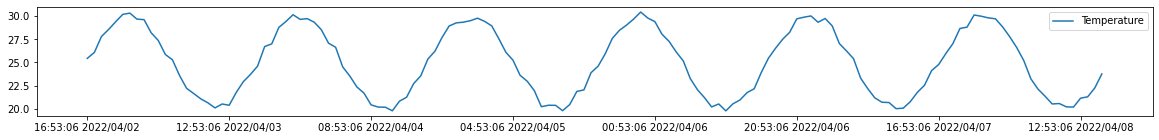

In [30]:
controleur.data_frame.plot(figsize=[20,2])

<h3 style="color:green">Simulation du rechauffement climatique


SI la temparature monte de 1°C tous les jours, ceci est simulable a l'aide d'une fonction affine de coéficient directeur de 1 et d'ordonnée a l'origine 0 <br>
En reprenant l'exemple d'avant


<AxesSubplot:>

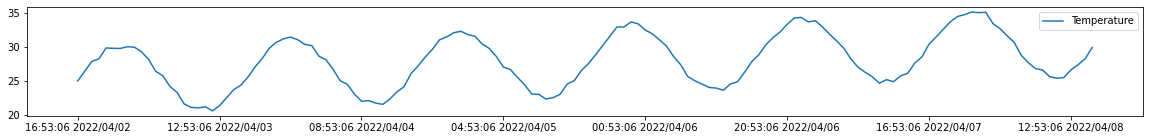

In [31]:
from formule_affine import FormuleAffine

# 3600 * 24 secondes par jours
formule_affine = FormuleAffine(1/(3600*24),0)

formule_temperature.ajouter_monoperiode(formule_affine)

controleur = Controleur(nombre_echantillon,periode)
controleur.ajouter_formule(formule_temperature)
controleur.calcul()
controleur.data_frame.plot(figsize=[20,2])